# Conditional VAE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import tensorflow as tf

In [2]:
import numpy as np
from model import CVAE_CNN3_ver2
from util import mnist_loader, shape_2d

In [3]:
mnist, size = mnist_loader()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Visualize Reconstructed images

In [4]:
# load model
network_architecture = dict(n_input=[28, 28, 1], n_z=20)
model_pr = CVAE_CNN3_ver2(10, network_architecture=network_architecture, load_model="./log/cvae_cnn3ver2/progress-150-model.ckpt")
model = CVAE_CNN3_ver2(10, network_architecture=network_architecture, load_model="./log/cvae_cnn3ver2/model.ckpt")

INFO:tensorflow:Restoring parameters from ./log/cvae_cnn3ver2/progress-150-model.ckpt
INFO:tensorflow:Restoring parameters from ./log/cvae_cnn3ver2/model.ckpt


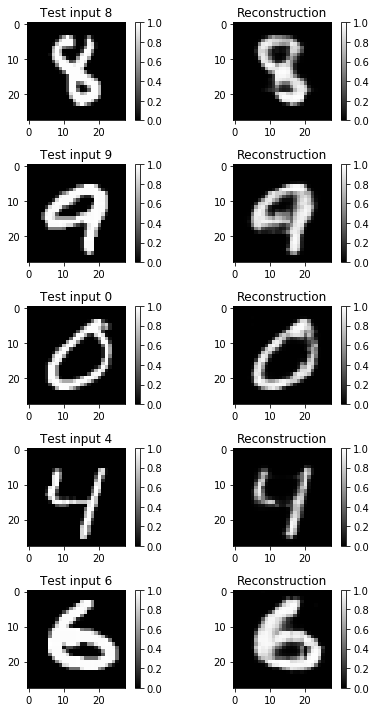

In [5]:
# feed test data and reconstruct
_x, _y = mnist.test.next_batch(model.batch_size)
_x = shape_2d(_x, model.batch_size)
reconstruction = model.reconstruct(_x, _y)

# plot
plt.figure(figsize=(6, 10))
_n = 5
for i in range(_n):
    plt.subplot(_n, 2, 2*i + 1)
    plt.imshow(_x[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input %i" % np.argmax(_y[i]))
    plt.colorbar()
    plt.subplot(_n, 2, 2*i + 2)
    plt.imshow(reconstruction[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

# generate based on constant stat

In [53]:
code = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for i in range(100):
    _x, _y = mnist.test.next_batch(model.batch_size)
    _x = shape_2d(_x, model.batch_size)
    _code = model.encode(_x, _y).tolist()
    for __x, __y, _c in zip(_x, _y, _code):
        code[np.argmax(__y)].append(_c)

### use mean of the each label's latent vector

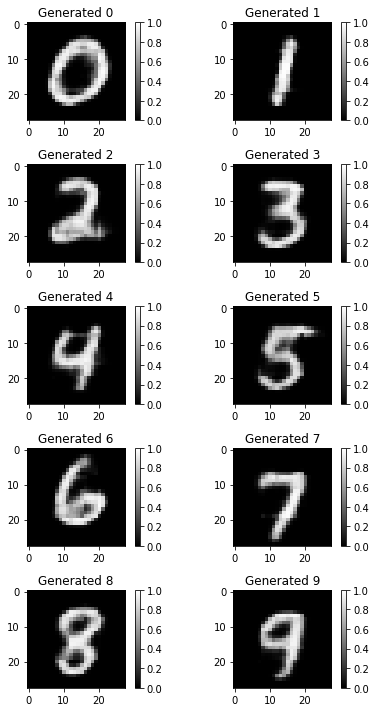

In [56]:
# convert label to one hot vector
o_h = np.eye(model.label_size)[[i for i in range(model.label_size)]]
true_label = np.tile(o_h, [int(model.batch_size/model.label_size), 1])

tmp = np.vstack([np.mean(code[_a], 0) for _a in range(model.label_size)])
z = np.tile(tmp, [int(model.batch_size/model.label_size), 1])

generated = model.decode(true_label, z)
plt.figure(figsize=(6, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(generated[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Generated %i" % np.argmax(true_label[i]))
    plt.colorbar()
plt.tight_layout()

### add noise to generate new data

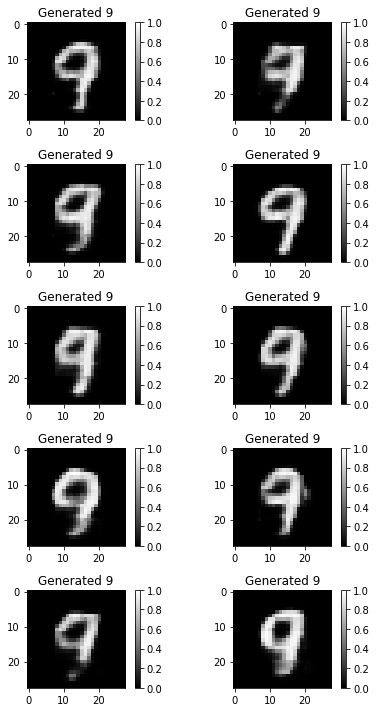

In [6]:
target_digit = 9
std = 0.5

# generate latent vector
code = []
for i in range(100):
    _x, _y = mnist.test.next_batch(model.batch_size)
    _x = shape_2d(_x, model.batch_size)
    _code = model.encode(_x, _y).tolist()
    for __x, __y, _c in zip(_x, _y, _code):
        if np.argmax(__y) == target_digit:
            code.append(_c)

# label
o_h = np.zeros(model.label_size)
o_h[target_digit] = 1
true_label = np.tile(o_h, [model.batch_size, 1])

z = np.tile(np.mean(code, 0), [model.batch_size, 1])
z += np.random.randn(model.batch_size, model.network_architecture["n_z"])*std

generated = model.decode(true_label, z)
plt.figure(figsize=(6, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(generated[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Generated %i" % np.argmax(true_label[i]))
    plt.colorbar()
plt.tight_layout()

# generate based on randoms

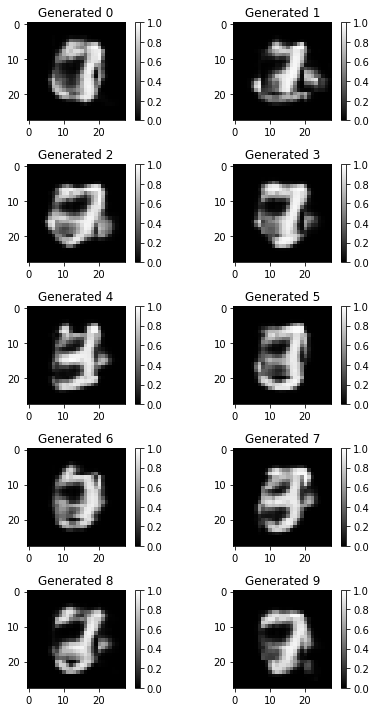

In [50]:
# convert label to one hot vector
o_h = np.eye(model.label_size)[[i for i in range(model.label_size)]]
true_label = np.tile(o_h, reps=[int(model.batch_size/model.label_size), 1])

generated = model.decode(true_label, mu=-3, std=0.5)
plt.figure(figsize=(6, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(generated[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Generated %i" % np.argmax(true_label[i]))
    plt.colorbar()
plt.tight_layout()

## Latent

6336
8192
8192
100
3072
8192
4608
256
INFO:tensorflow:Restoring parameters from ./log/cvae_cnn3ver2_2d/model.ckpt


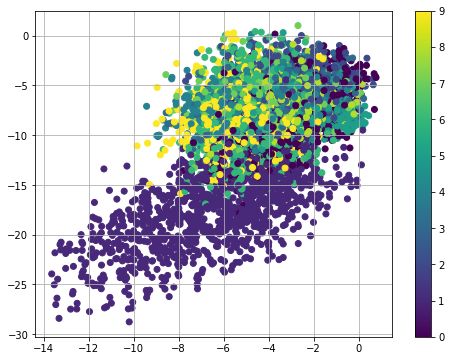

In [86]:
# load model
network_architecture = dict(n_input=[28, 28, 1], n_z=2)
# model_2d = CVAE_CNN3_ver2(10, network_architecture=network_architecture, load_model="./log/cvae_cnn3ver2_2d/progress-50-model.ckpt")
model_2d = CVAE_CNN3_ver2(10, network_architecture=network_architecture, load_model="./log/cvae_cnn3ver2_2d/model.ckpt")

# generate latent vector
# since the network's batch size is fixed, generation is executed by iteration

_n = 10000
flg = int(_n/model.batch_size)
cnt = 0
y, z = [], []
while cnt < _n:
    _x, _y = mnist.train.next_batch(model.batch_size)
    _x = shape_2d(_x, model.batch_size)
    z_mu = model_2d.encode(_x, _y)
    z.append(z_mu)
    y.append(_y)
    cnt += model.batch_size
z = np.vstack(z)
y = np.vstack(y)

# plot
plt.figure(figsize=(8, 6)) 
plt.scatter(z[:, 0], z[:, 1], c=np.argmax(y, 1))
plt.colorbar()
plt.grid()

## Visualize latent space
- to see this, run CVAE with 2 latent dimension